In [6]:
import datetime as dt
import random

import numpy as np
import pandas as pd

import kquant as kq


# API_account
def set_api_account():
    kq.set_api("KRX2308020", "EQDkUcyI3dK6oIAXqAR8BXOK4bKxHHmH")
    return None


set_api_account()

In [15]:
rank_stocks_df=kq.rank_stocks()

In [18]:
symbol_loader=SYMBOL_LOADER()
symbols=symbol_loader()

In [17]:
class SYMBOL_LOADER:
    """
    SYMBOL_LOADER : 거래가능한 주식 symbol을 필터-추출하는 클래스
    """

    @staticmethod
    def load_symbols_df() -> pd.DataFrame:
        """
        한국거래소 종목 목록 데이터프레임을 호출하는 메서드

        :return : 한국거래소 종목 목록 데이터프레임
        :rtype : pd.DataFrame
        """
        symbols_df = kq.symbol_stock()
        return symbols_df

    class SYMBOL_FILTER:
        """
        SYMBOl_FILTER : symbols를 filtering 하는 클래스
        """

        @staticmethod
        def filter__market(symbols_df: pd.DataFrame) -> pd.DataFrame:
            """
            market에 대한 필터링을 진행하는 메서드

            :param pd.DataFrame : symbols_df : 한국거래소 종목 목록 데이터프레임
            :return: MARKET이 [코스닥, 유가증권]에 속하는 데이터프레임
            :rtype: pd.DataFrame
            """
            filtered_symbols_df = symbols_df[
                (symbols_df["MARKET"].isin(["코스닥", "유가증권"]))
            ].copy()
            return filtered_symbols_df

        @staticmethod
        def filter__admin_issue(symbols_df: pd.DataFrame) -> pd.DataFrame:
            """
            ADMIN_ISSUE에 대한 필터링을 진행하는 메서드

            :param pd.DataFrame : symbols_df : 한국거래소 종목 목록 데이터프레임
            :return: ADMIN_ISSUE가 0인 데이터프레임
            :rtype: pd.DataFrame
            """
            filtered_symbols_df = symbols_df[(symbols_df["ADMIN_ISSUE"] == 0)].copy()
            return filtered_symbols_df

        @staticmethod
        def filter_sec_type(symbols_df: pd.DataFrame) -> pd.DataFrame:
            """
            SEC_TYPE에 대한 필터링을 진행하는 메서드

            :param pd.DataFrame : symbols_df : 한국거래소 종목 목록 데이터프레임
            :return: SEC_TYPE이 [ST, EF, EN]에 속하는 데이터프레임
            :rtype: pd.DataFrame
            """
            filtered_symbols_df = symbols_df[
                symbols_df["SEC_TYPE"].isin(["ST", "EF", "EN"])
            ].copy()
            return filtered_symbols_df

    def filter_symbols_df(self, symbols_df: pd.DataFrame) -> pd.DataFrame:
        """
        symbol_df 에 대한 필터링을 진행하는 메서드

        :param pd.DataFrame : symbols_df : 한국거래소 종목 목록 데이터프레임
        :return: SYMBOL_FILTER의 메서드를 거친 데이터프레임
        :rtype: pd.DataFrame
        """
        symbol_filter = self.SYMBOL_FILTER()
        filtered_symbols_df = symbol_filter.filter__market(symbols_df)
        filtered_symbols_df = symbol_filter.filter__admin_issue(filtered_symbols_df)
        filtered_symbols_df = symbol_filter.filter_sec_type(filtered_symbols_df)
        return filtered_symbols_df

    @staticmethod
    def get_symbols(symbols_df: pd.DataFrame) -> list:
        """
        symbols_df의 symbol을 중복을 제거하여 추출하는 메서드

        :param pd.DataFrame : symbols_df : 한국거래소 종목 목록 데이터프레임
        :return: symbols
        :rtype: list
        """
        symbols = sorted(set(symbols_df["SYMBOL"]))
        return symbols

    # SYMBOL_LOADER PIPELINE
    def __call__(self) -> list:
        """
        SYMBOL_LOADER의 파이프라인을 제공하는 메서드

        :return: 필터를 거친 symbols
        :rtype: list
        """
        symbols_df = self.load_symbols_df()
        filtered_symbols_df = self.filter_symbols_df(symbols_df)
        symbols = self.get_symbols(filtered_symbols_df)
        return symbols

In [11]:
!pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)


In [19]:
from tqdm import tqdm

In [20]:
results = list()

failed = 0
for symbol in tqdm(symbols):
    try:
        company_info = kq.company_info(symbol=symbol)
        company_info_dict = company_info.to_dict()
        sector_code = company_info_dict["SECTOR_CODE"]
        sector_name = company_info_dict["SECTOR_NAME"]
        results.append(
            {
                "SYMBOL": symbol,
                "SECTOR_CODE": sector_code,
                "SECTOR_NAME": sector_name,
            }
        )
    except:
        failed += 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3565/3565 [06:22<00:00,  9.31it/s]


In [23]:
failed

1686

In [21]:
result_df = pd.DataFrame(results)

In [22]:
result_df.to_csv("./sector_df.csv",index=False)

In [30]:
result_df.groupby('SECTOR_NAME').count().sort_values('SYMBOL')

,SYMBOL,SECTOR_CODE
SECTOR_NAME,,
통신업,5,5
종이.목재,8,8
통신서비스,8,8
의료정밀,8,8
전기가스,10,10
인터넷,10,10
방송서비스,10,10
보험업,11,11
기타제조,15,15


In [32]:
sampled_ffff=result_df.groupby('SECTOR_NAME').sample(10,replace=True)

In [35]:
sampled_ffff = sampled_ffff.drop_duplicates()

In [45]:
sector_names=sorted(set(sampled_ffff['SECTOR_NAME']))
sector_name = sector_names[0]

In [47]:
_sampled_ffff = sampled_ffff[sampled_ffff["SECTOR_NAME"] == sector_name]

In [64]:
_sampled_ffff

,SYMBOL,SECTOR_CODE,SECTOR_NAME
624,037330,IKQ160,IT부품
"1,312",148930,IKQ160,IT부품
"1,377",191410,IKQ160,IT부품
"1,062",091700,IKQ160,IT부품
765,052710,IKQ160,IT부품
707,045970,IKQ160,IT부품
756,052020,IKQ160,IT부품
"1,094",094970,IKQ160,IT부품
986,082210,IKQ160,IT부품


In [65]:
_symbol


'037330'

In [49]:
_symbols = sorted(set(_sampled_ffff['SYMBOL']))
_symbol = _symbols[0]

In [51]:
_df=kq.daily_stock(_symbol)

In [62]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b5/24/aaccf324ce862bb82277e8814d2aebbb2a2c160d04e95aa2b8c9dc3137a9/matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f1/6b/e4b0f8708f22dd7c321f87eadbb98708975e115ac6582eb46d1f32197ce6/contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/2b/e8/61b8525acf26ec222518bdff127ae502bfa3408981fb5e5493f2b037d7fb/fonttools-4.42.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached fonttools-4.42.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (150 kB)
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonh

<Axes: >

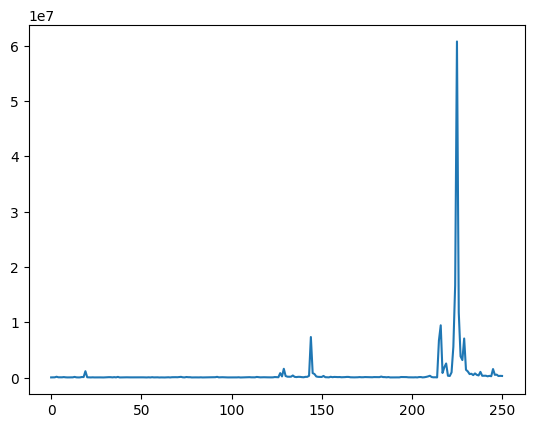

In [63]:
_df['VOLUME'].plot()

In [34]:
len(result_df['SECTOR_NAME'].unique())

40

In [32]:
result_df.groupby('SECTOR_NAME').count()

,SYMBOL,SECTOR_CODE
SECTOR_NAME,,
IT부품,100,100
건설업,29,29
금속,66,66
기계,38,38
기계.장비,105,105
기타제조,15,15
디지털컨텐츠,45,45
반도체,129,129
방송서비스,10,10


In [17]:
company_info = kq.company_info(symbol=symbols[190])

In [19]:
company_info.to_dict()

{'SYMBOL': '003480',
 'MARKET': '유가증권',
 'NAME': '한진중공업홀딩스',
 'NAME_EN': 'HHICHoldings',
 'FULLNAME': '한진중공업홀딩스',
 'FULLNAME_EN': 'HanjinHeavyInd&ConstHoldings',
 'BIZ_REG_NO': '6018108008',
 'CORP_REG_NO': '1101110110083',
 'CEO': '조남호, 조원국',
 'ADDR': '경기도 남양주시 별내3로 391 관리동 1층',
 'ZIP': '12092',
 'TEL': '031-570-5600',
 'IR_TEL': '031-570-5600',
 'URL': 'www.hhic-holdings.com',
 'AUDITOR': '삼덕회계법인',
 'BANK': '우리은행',
 'SECTOR_CODE': 'IKS017',
 'SECTOR_NAME': '전기가스',
 'EST_DT': '19370710',
 'LIST_DT': '19560303',
 'DELIST_DT': None,
 'EMP_NO': 7,
 'FISCAL_MONTH': 12}

In [ ]:
"""
총 부채 : 113000
유동 자산 : 111100

영업 이익 : 121500
감가 상각 : 122100
"""

In [78]:
kq.account_code_search("EB")

,ACCOUNT_CODE,NAME,NAME_EN,UNIT
0,123000,EBITDA,EBITDA,천원
1,123005,EBITDA(TTM),EBITDA(TTM),천원
2,123200,EBITDA2,EBITDA2,천원
3,123205,EBITDA2(TTM),EBITDA2(TTM),천원
4,123100,EBIT,EBIT,천원
5,123105,EBIT(TTM),EBIT(TTM),천원
6,213120,Operating EBIT,Operating EBIT,천원
7,211350,EBITDA마진율,EBITDA/Sales,비율
8,211900,EBITDA2마진율,EBITDA2/Sales,비율
9,232200,EBITDA증가율(YoY),EBITDA Growth(YoY),비율


In [69]:
kq.account_code_search("자본")

,ACCOUNT_CODE,NAME,NAME_EN,UNIT
0,115000,자본총계,Total Stockholders' Equity,천원
1,115020,자본총계(지배),Total Stockholders' Equity(Owners of Parent Eq...,천원
2,115010,자본총계(TTM),Total Stockholders' Equity(TTM),천원
3,115005,"자본총계(지배, TTM)",Total Stockholders' Equity(Owners of Parent Eq...,천원
4,115025,"자본총계(지배, MAIN, TTM)",Total Stockholders' Equity(Owners of Parent Eq...,천원
5,115100,자본금,Paid-in Capital,천원
6,115250,신종자본증권,Hybrid Bond,천원
7,115500,자본잉여금,Capital Surplus,천원
8,115700,기타자본,Other Reserves,천원
9,140200,"자본총계(지분법적용, 주석)","Total Stockholders' Equity(Equity Method, Note)",천원


,ACCOUNT_CODE,NAME,NAME_EN,UNIT
0,111000,자산총계,Total Assets,천원
1,111100,유동자산,Current Assets,천원
2,111600,비유동자산,Non-current Assets,천원
3,113000,부채총계,Total Liabilities,천원
4,113100,유동부채,Current Liabilities,천원
...,...,...,...,...
707,706600,전체시가총액(평균),All Mkt. Cap.(Avg.),백만원
708,701100,액면가,Par Value,원/주
709,707000,종업원수,Employee,명
710,707200,공시지가,Land Price,천원


In [ ]:
134000